**Regression & Its Evaluation | Assignment**

**Question 1:  What is Simple Linear Regression?**

Simple linear regression is a statistical method for studying the relationship between two quantitative variables: a single independent variable (X) and a single dependent variable (Y). It aims to find the best-fitting straight line through a set of data points to model this relationship, allowing for predictions of the dependent variable based on the independent variable. The model uses a formula like Y = β₀ + β₁X + ε, where β₀ is the intercept, β₁ is the slope, and ε is the random error.  

Key ideas

Goal: Minimize the sum of squared errors (SSE) between the observed y-values and the predictions from the line. This is called the least squares method.

Assumptions:

Linear relationship between x and y.

Errors are normally distributed with mean zero.

Homoscedasticity (errors have constant variance).

Observations are independent.




**Question 2: What are the key assumptions of Simple Linear Regression?**

Key Assumptions

1. Linear relationship between x and y.

2. Errors are normally distributed with mean zero.

3. Homoscedasticity (errors have constant variance).

4. Observations are independent.

**Question 3: What is heteroscedasticity, and why is it important to address in regression
models?**

Heteroscedasticity is when the variance of the errors in a regression model isn’t constant across all levels of the independent variable(s).
Instead of your residuals (prediction errors) being evenly “spread out” around the regression line, their spread changes—maybe small for low x-values and huge for high x-values, or vice versa.

Why it matters

Biased estimates of uncertainty: The regression coefficients themselves (β values) remain unbiased, but the standard errors of those estimates become unreliable. This can make your t-tests and confidence intervals misleading—your model might look more confident than it really is or fail to detect real effects.

Inefficient estimates: Ordinary Least Squares (OLS) is no longer the “best linear unbiased estimator” under heteroscedasticity. You lose statistical efficiency—your estimates could have unnecessarily high variance.

Prediction issues: If the variance grows with x, predictions at high x-values may be much less trustworthy.


**Question 5: What is polynomial regression, and how does it differ from linear
regression?**


Polynomial regression fits a curved line to a dataset to model non-linear relationships, whereas linear regression fits a straight line to model linear relationships. The difference lies in the equation used: linear regression uses a simple linear equation (y = mx + c), while polynomial regression uses a polynomial equation with higher-degree terms of the independent variable (y = a_nx^n + ... + a_1x + a_0). This makes polynomial regression more flexible for capturing complex, curved patterns in data that linear regression cannot

**Relationship Type:** Linear regression models linear relationships; polynomial regression models non-linear, curved relationships.
**Equation Form:** Linear regression uses a straight-line equation, while polynomial regression uses a curve-fitting polynomial equation with higher-order terms of the independent variable.
**Flexibility:** Polynomial regression is more flexible than linear regression, allowing it to fit complex patterns in the data that a straight line cannot.

**Question 6:  Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]**

Slope (β₁): 1.980
Intercept (β₀): 0.180


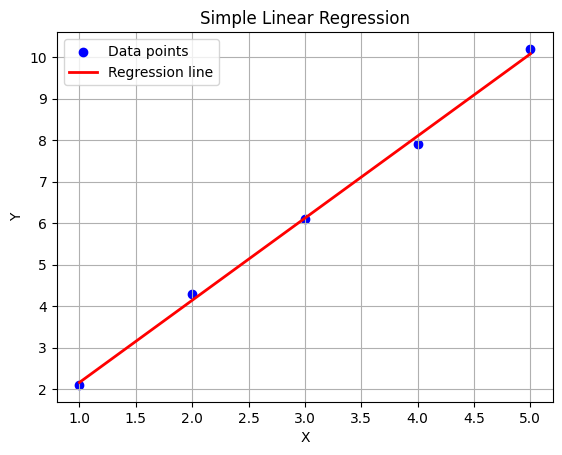

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # reshape for sklearn (n_samples, n_features)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Get predictions
Y_pred = model.predict(X)

# Print slope and intercept
print(f"Slope (β₁): {model.coef_[0]:.3f}")
print(f"Intercept (β₀): {model.intercept_:.3f}")

# Plot data points and regression line
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression line')

plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


**Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.
(Include your Python code and output in the code box below.)**

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --- Sample Data ---
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

# Create DataFrame
df = pd.DataFrame({'Area': Area, 'Rooms': Rooms, 'Price': Price})

# --- Multiple Linear Regression ---
X = df[['Area', 'Rooms']]
y = df['Price']

model = LinearRegression()
model.fit(X, y)

print(f"Slope coefficients: {list(zip(X.columns, model.coef_))}")
print(f"Intercept: {model.intercept_:.2f}")

# --- Check for multicollinearity using VIF ---
# Add constant for intercept (needed for statsmodels VIF)
X_with_const = np.column_stack((np.ones(X.shape[0]), X))

vif_data = pd.DataFrame()
vif_data['Feature'] = ['Intercept'] + X.columns.tolist()
vif_data['VIF'] = [variance_inflation_factor(X_with_const, i)
                    for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factors:")
print(vif_data)


Slope coefficients: [('Area', np.float64(63.15789473684211)), ('Rooms', np.float64(34736.842105263146))]
Intercept: 103157.89

Variance Inflation Factors:
     Feature        VIF
0  Intercept  34.210526
1       Area   7.736842
2      Rooms   7.736842


**Question 8:  Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
3
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.
(Include your Python code and output in the code box below**

Coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938


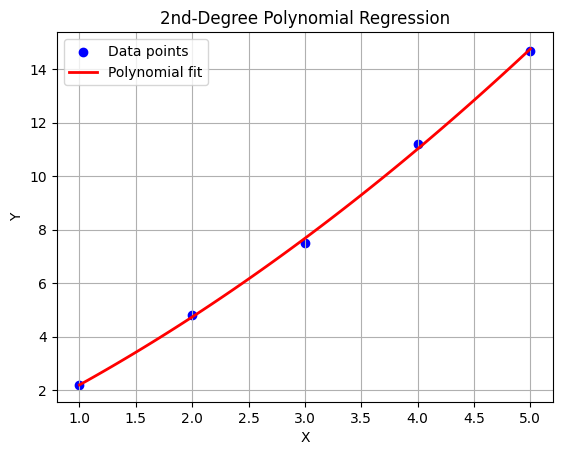

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# --- Sample Data ---
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# --- Transform features for 2nd-degree polynomial ---
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# --- Fit the model ---
model = LinearRegression()
model.fit(X_poly, Y)

# --- Predictions for smooth curve ---
X_range = np.linspace(1, 5, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
Y_pred = model.predict(X_range_poly)

# --- Print coefficients ---
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# --- Plotting ---
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X_range, Y_pred, color='red', linewidth=2, label='Polynomial fit')

plt.title('2nd-Degree Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


**Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.
(Include your Python code and output in the code box below.)**

Slope (β₁): 1.150
Intercept (β₀): 6.500
Residuals: [-3.   5.5 -1.  -2.5  1. ]


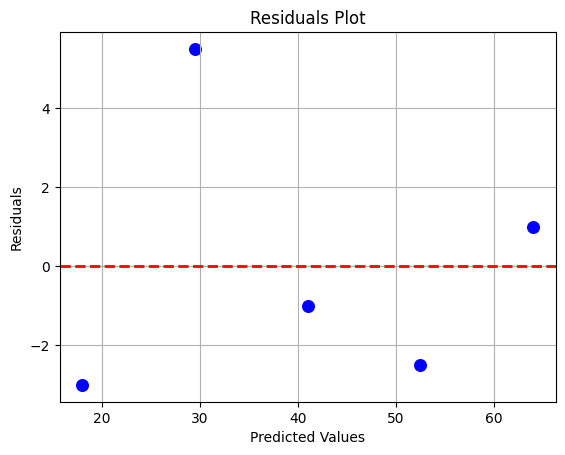

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- Sample Data ---
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# --- Fit Linear Regression Model ---
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# --- Compute Residuals ---
residuals = Y - Y_pred

# --- Print coefficients and residuals ---
print(f"Slope (β₁): {model.coef_[0]:.3f}")
print(f"Intercept (β₀): {model.intercept_:.3f}")
print("Residuals:", residuals)

# --- Residuals Plot ---
plt.scatter(Y_pred, residuals, color='blue', s=70)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
